In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [32]:
#Assignment 1: Exploring Canadian Health & Income Data with Visualization

# PART A: Understanding the Data

#A1

health_df = pd.read_csv('Canadian_Health_Survey_Sample.csv')

#A2

health_df.head()
health_df.info()
health_df.describe(include='all')

#A3
#Age is an quantitative attribute as it's represented numerically while Gender is qualitative as it's a descriptive and can't be measured numerically.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          850 non-null    object 
 1   Gender            850 non-null    object 
 2   Age               850 non-null    int64  
 3   Income            816 non-null    float64
 4   BMI               808 non-null    float64
 5   PhysicalActivity  825 non-null    float64
 6   Smoking           850 non-null    object 
 7   SelfRatedHealth   850 non-null    object 
 8   StressLevel       825 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 59.9+ KB


,Province,Gender,Age,Income,BMI,PhysicalActivity,Smoking,SelfRatedHealth,StressLevel
count,850,850,850.000000,816.000000,808.000000,825.000000,850,850,825.000000
unique,10,6,NaN,NaN,NaN,NaN,6,5,NaN
top,Quebec,Male,NaN,NaN,NaN,NaN,No,Good,NaN
freq,100,230,NaN,NaN,NaN,NaN,552,258,NaN
mean,NaN,NaN,49.517647,77461.917892,27.488861,3.511394,NaN,NaN,5.294545
std,NaN,NaN,18.192604,22497.833440,5.064344,1.925825,NaN,NaN,2.121156
min,NaN,NaN,18.000000,5000.000000,13.500000,0.000000,NaN,NaN,1.000000
25%,NaN,NaN,33.000000,63438.000000,24.000000,2.100000,NaN,NaN,4.000000
50%,NaN,NaN,49.000000,78130.000000,27.300000,3.500000,NaN,NaN,5.000000
75%,NaN,NaN,66.000000,90529.500000,30.900000,4.700000,NaN,NaN,7.000000


In [33]:
# PART B - Cleaning & Structuring

#B1 
health_df['Gender'] = health_df['Gender'].str.lower()
health_df.loc[health_df['Gender'].isin(['m', 'male']), 'Gender'] = 'Male'
health_df.loc[health_df['Gender'].isin(['f', 'female']), 'Gender'] = 'Female'

print(health_df['Gender'].unique())

health_df['Smoking'] = health_df['Smoking'].str.lower()
health_df.loc[health_df['Smoking'].isin(['y', 'yes']), 'Smoking'] = 'Yes'
health_df.loc[health_df['Smoking'].isin(['n', 'no']), 'Smoking'] = 'No'

print(health_df['Smoking'].unique())

#B2
cols = ['BMI','Income','StressLevel','PhysicalActivity']
health_df = health_df.dropna(subset = cols)

print(health_df.isna().sum())

#B3
health_df = health_df.astype({'Age': 'int', 'Income': 'float', 'BMI': 'float', 'StressLevel': 'int'})

#B4 
# https://www.canada.ca/en/health-canada/services/food-nutrition/healthy-eating/healthy-weights/canadian-guidelines-body-weight-classification-adults/quick-reference-tool-professionals.html as reference for BMI categories
health_df['BMI_Category'] = None
health_df['IncomeBracket'] = None

health_df.loc[health_df['BMI'] < 18.5, 'BMI_Category'] = 'Underweight'
health_df.loc[(health_df['BMI'] >= 18.5) & (health_df['BMI'] < 25), 'BMI_Category'] = 'Normal'
health_df.loc[(health_df['BMI'] >= 25) & (health_df['BMI'] < 30), 'BMI_Category'] = 'Overweight'
health_df.loc[health_df['BMI'] >= 30, 'BMI_Category'] = 'Obese'

print(health_df['BMI_Category'].unique())

health_df.loc[health_df['Income'] < 50000, 'IncomeBracket'] = '<50K'
health_df.loc[(health_df['Income'] >= 50000) & (health_df['Income'] < 80000), 'IncomeBracket'] = '50-80K'
health_df.loc[(health_df['Income'] >= 80000) & (health_df['Income'] < 110000), 'IncomeBracket'] = '80K-110K'
health_df.loc[health_df['Income'] > 110000, 'IncomeBracket'] = '>110K'

print(health_df['IncomeBracket'].unique())

['Female' 'Male']
['Yes' 'No']
Province            0
Gender              0
Age                 0
Income              0
BMI                 0
PhysicalActivity    0
Smoking             0
SelfRatedHealth     0
StressLevel         0
dtype: int64
['Overweight' 'Normal' 'Obese' 'Underweight']
['80K-110K' '>110K' '50-80K' '<50K']


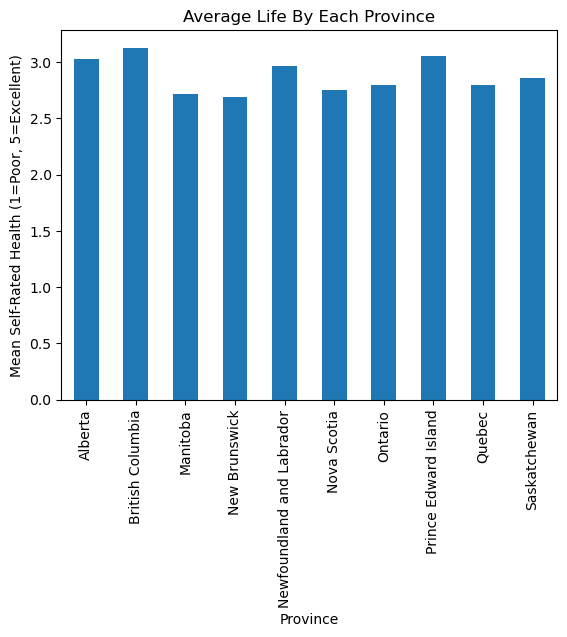

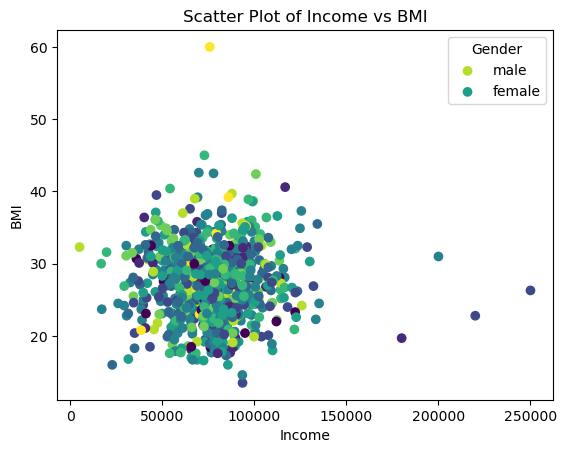

<function matplotlib.pyplot.show(close=None, block=None)>

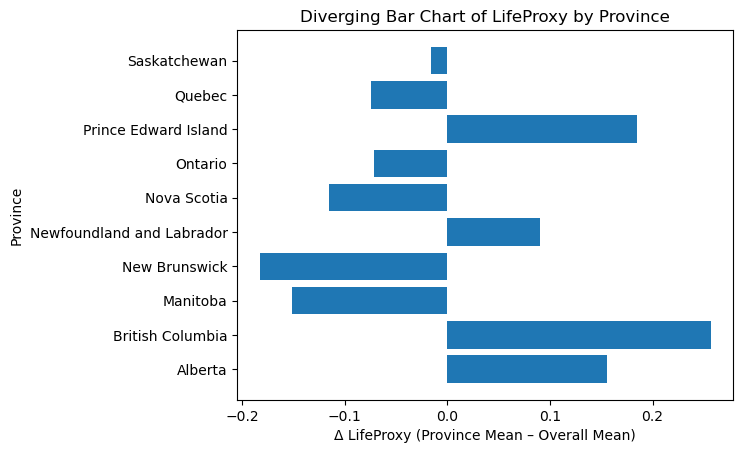

In [ ]:
#PART C - Visualization
#C1
SelfRatedHealth = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Great': 4,
    'Excellent': 5
}

health_df['SelfRatedHealth'] = health_df['SelfRatedHealth'].map(SelfRatedHealth)
health_df.groupby("Province")['SelfRatedHealth'].mean().plot(
    kind='bar',
    title='Average Life By Each Province',
    ylabel='Mean Self-Rated Health (1=Poor, 5=Excellent)',
    xlabel='Province'
)

plt.show()

#C2
male_df = health_df[health_df['Gender'] == 'Male']
female_df = health_df[health_df['Gender'] =='Female']

male = plt.scatter(
    male_df['Income'],
    male_df['BMI'],
    c = male_df['StressLevel'],
    label = "male",
)
female=plt.scatter(
    female_df['Income'],
    female_df['BMI'],
    c = female_df['StressLevel'],
    label = "female",
)
plt.title("Scatter Plot of Income vs BMI")
plt.xlabel("Income")
plt.ylabel("BMI")
plt.legend(title="Gender")
plt.show()


#C3
overall_mean = health_df['SelfRatedHealth'].mean()
province_mean = (health_df.groupby('Province')['SelfRatedHealth'].mean().reset_index())
province_mean['Difference'] = province_mean['SelfRatedHealth'] - overall_mean

plt.barh(province_mean['Province'], province_mean['Difference'])
plt.xlabel('Δ LifeProxy (Province Mean – Overall Mean)')
plt.ylabel('Province')
plt.title('Diverging Bar Chart of LifeProxy by Province')
plt.show



In [ ]:
#PART D - Interpretation
#D1 The relationship between Income and BMI appears to be weakly negative, indicating that as income increases, BMI tends to decrease slightly.
# This suggests that individuals with higher incomes may have better access to healthier food options and fitness resources, leading to lower BMI levels. 
# Additionally, the color gradient representing StressLevel indicates that higher stress levels are associated with higher BMI values,
#  suggesting a potential link between stress and weight gain.

#D2 Limitation with the data quality is that it relies on self-reported data which can be biased or inaccurate.
#  This leaves room for misreporting or misunderstanding of questions by respondents, which can affect the reliability of the data and any conclusions drawn from it.


In [35]:
health_df.to_csv('Canadian_Health_Survey_Cleaned.csv', index=False)